In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
train = pd.read_csv('D:/work/Rheumatoid arthritis/data/train.csv')
ar = np.array(train)
rownames = ar[:,0]
colnames = train.columns[1:]
ar = ar[:,1:]
train = pd.DataFrame(ar)
train.index = rownames
train.columns = colnames
train = np.transpose(train)

In [13]:
test = pd.read_csv('D:/work/Rheumatoid arthritis/data/test.csv')
ar = np.array(test)
rownames = ar[:,0]
colnames = test.columns[1:]
ar = ar[:,1:]
test = pd.DataFrame(ar)
test.index = rownames
test.columns = colnames
test = np.transpose(test)

In [14]:
x = np.array(train)
rownames = list(train.index)
y = []
for row in rownames:
    if row[:2] == 'RA':
        y.append(1)
    if row[:2] == 'HC':
        y.append(0)
y = np.array(y)

test_x = np.array(test)
rownames = list(test.index)
test_y = []
for row in rownames:
    if row[:2] == 'RA':
        test_y.append(1)
    if row[:2] == 'HC':
        test_y.append(0)
test_y = np.array(test_y)

num_validations = 100
num_cutoff = 100
penalty = 'l1'
C = 1
validation_size = 100
train_tpr_matrix = np.zeros((num_validations, num_cutoff))
train_fpr_matrix = np.zeros((num_validations, num_cutoff))
train_sens_matrix = np.zeros((num_validations, num_cutoff))
train_spec_matrix = np.zeros((num_validations, num_cutoff))
train_ppv_matrix = np.zeros((num_validations, num_cutoff))
train_npv_matrix = np.zeros((num_validations, num_cutoff))
test_tpr_matrix = np.zeros((num_validations, num_cutoff))
test_fpr_matrix = np.zeros((num_validations, num_cutoff))
test_sens_matrix = np.zeros((num_validations, num_cutoff))
test_spec_matrix = np.zeros((num_validations, num_cutoff))
test_ppv_matrix = np.zeros((num_validations, num_cutoff))
test_npv_matrix = np.zeros((num_validations, num_cutoff))

for i in range(num_validations):
    train_x, validation_x, train_y, validation_y = train_test_split(x, y, test_size = validation_size)
    
    clf = LogisticRegression(C = C, penalty = penalty, solver='liblinear')
    clf.fit(train_x, train_y)

    train_probability = list(clf.predict_proba(train_x)[:,1])
    test_probability = list(clf.predict_proba(test_x)[:,1])

    for j in range(num_cutoff):
        cutoff = j / 100
        tp, fp, tn, fn = 0, 0, 0, 0
        for k in range(len(train_probability)):
            if train_probability[k] >= cutoff and train_y[k] == 1:
                tp += 1
            elif train_probability[k] >= cutoff and train_y[k] == 0:
                fp += 1
            elif train_probability[k] < cutoff and train_y[k] == 0:
                tn += 1
            elif train_probability[k] < cutoff and train_y[k] == 1:
                fn += 1
        train_tpr_matrix[i,j] = tp / (tp + fn + 0.00001)
        train_fpr_matrix[i,j] = fp / (fp + tn + 0.00001)
        train_sens_matrix[i,j] = tp / (tp + fn + 0.00001)
        train_spec_matrix[i,j] = tn / (tn + fp + 0.00001)
        train_ppv_matrix[i,j] = tp / (tp + fp + 0.00001)
        train_npv_matrix[i,j] = tn / (tn + fn + 0.00001)
    
    for j in range(num_cutoff):
        cutoff = j / 100
        tp, fp, tn, fn = 0, 0, 0, 0
        for k in range(len(test_probability)):
            if test_probability[k] >= cutoff and test_y[k] == 1:
                tp += 1
            elif test_probability[k] >= cutoff and test_y[k] == 0:
                fp += 1
            elif test_probability[k] < cutoff and test_y[k] == 0:
                tn += 1
            elif test_probability[k] < cutoff and test_y[k] == 1:
                fn += 1
        test_tpr_matrix[i,j] = tp / (tp + fn + 0.00001)
        test_fpr_matrix[i,j] = fp / (fp + tn + 0.00001)
        test_sens_matrix[i,j] = tp / (tp + fn + 0.00001)
        test_spec_matrix[i,j] = tn / (tn + fp + 0.00001)
        test_ppv_matrix[i,j] = tp / (tp + fp + 0.00001)
        test_npv_matrix[i,j] = tn / (tn + fn + 0.00001)

test_tpr_mean, test_tpr_up_mean, test_tpr_down_mean, test_fpr_mean, test_fpr_up_mean, test_fpr_down_mean, test_sens_mean, test_spec_mean, test_ppv_mean, test_npv_mean, test_auc_l, test_cutoff = [], [], [], [], [], [], [], [], [], [], [], []
train_tpr_mean, train_tpr_up_mean, train_tpr_down_mean, train_fpr_mean, train_fpr_up_mean, train_fpr_down_mean, train_sens_mean, train_spec_mean, train_ppv_mean, train_npv_mean, train_auc_l, train_cutoff = [], [], [], [], [], [], [], [], [], [], [], []
for i in range(num_validations):
    train_auc_l.append(auc(train_fpr_matrix[i,:], train_tpr_matrix[i,:]))
for i in range(num_validations):
    test_auc_l.append(auc(test_fpr_matrix[i,:], test_tpr_matrix[i,:]))
for j in range(num_cutoff):
    train_cutoff.append(j / num_cutoff)
    train_tpr_mean.append(np.mean(train_tpr_matrix[:,j]))
    train_tpr_up_mean.append(np.mean(train_tpr_matrix[:,j]) + (np.std(train_tpr_matrix[:,j]) / num_validations) * 1.96)
    train_tpr_down_mean.append(np.mean(train_tpr_matrix[:,j]) - (np.std(train_tpr_matrix[:,j]) / num_validations) * 1.96)
    train_fpr_mean.append(np.mean(train_fpr_matrix[:,j]))
    train_fpr_up_mean.append(np.mean(train_fpr_matrix[:,j]) + (np.std(train_fpr_matrix[:,j]) / num_validations) * 1.96)
    train_fpr_down_mean.append(np.mean(train_fpr_matrix[:,j]) - (np.std(train_fpr_matrix[:,j]) / num_validations) * 1.96)
    train_sens_mean.append(np.mean(train_sens_matrix[:,j]))
    train_spec_mean.append(np.mean(train_spec_matrix[:,j]))
    train_ppv_mean.append(np.mean(train_ppv_matrix[:,j]))
    train_npv_mean.append(np.mean(train_npv_matrix[:,j]))
    
    test_cutoff.append(j / num_cutoff)
    test_tpr_mean.append(np.mean(test_tpr_matrix[:,j]))
    test_tpr_up_mean.append(np.mean(test_tpr_matrix[:,j]) + (np.std(test_tpr_matrix[:,j]) / num_validations) * 1.96)
    test_tpr_down_mean.append(np.mean(test_tpr_matrix[:,j]) - (np.std(test_tpr_matrix[:,j]) / num_validations) * 1.96)
    test_fpr_mean.append(np.mean(test_fpr_matrix[:,j]))
    test_fpr_up_mean.append(np.mean(test_fpr_matrix[:,j]) + (np.std(test_fpr_matrix[:,j]) / num_validations) * 1.96)
    test_fpr_down_mean.append(np.mean(test_fpr_matrix[:,j]) - (np.std(test_fpr_matrix[:,j]) / num_validations) * 1.96)
    test_sens_mean.append(np.mean(test_sens_matrix[:,j]))
    test_spec_mean.append(np.mean(test_spec_matrix[:,j]))
    test_ppv_mean.append(np.mean(test_ppv_matrix[:,j]))
    test_npv_mean.append(np.mean(test_npv_matrix[:,j]))

In [9]:
index=60
print(np.mean(train_sens_matrix[:, index]), (np.std(train_sens_matrix[:, index]) / 100) * 1.96)
print(np.mean(train_spec_matrix[:, index]), (np.std(train_spec_matrix[:, index]) / 100) * 1.96)
print(np.mean(train_ppv_matrix[:, index]), (np.std(train_ppv_matrix[:, index]) / 100) * 1.96)
print(np.mean(train_npv_matrix[:, index]), (np.std(train_npv_matrix[:, index]) / 100) * 1.96)

0.9288877695086463 0.00010457167897692834
0.9912995354159929 7.788827316139805e-05
0.9929499110357628 6.326672226139654e-05
0.9135220258590864 0.00012419089368995756


In [10]:
train_x = x
train_y = y
clf = LogisticRegression(C = C, penalty = penalty, solver='liblinear')
clf.fit(train_x, train_y)
train_probability = list(clf.predict_proba(train_x)[:,1])
cutoff = 0.6
tp, fp, tn, fn = 0, 0, 0, 0
for k in range(len(test_probability)):
    if train_probability[k] >= cutoff and train_y[k] == 1:
        tp += 1
    elif train_probability[k] >= cutoff and train_y[k] == 0:
        fp += 1
    elif train_probability[k] < cutoff and train_y[k] == 0:
        tn += 1
    elif train_probability[k] < cutoff and train_y[k] == 1:
        fn += 1
accuracy = (tp + tn) / (tp + fp + tn + fn)
print(accuracy)

1.0


In [15]:
print(auc(train_fpr_mean, train_tpr_mean), (np.std(train_auc_l) / 100) * 1.96)

0.996250684749019 1.2826314746997917e-05


In [16]:
stats.ttest_1samp(train_auc_l, 0.99).pvalue

1.807670760012514e-98

In [35]:
result = np.transpose(pd.DataFrame([train_tpr_up_mean, train_tpr_mean, train_tpr_down_mean, train_fpr_up_mean, train_fpr_mean, train_fpr_down_mean, train_sens_mean, train_spec_mean, train_ppv_mean, train_npv_mean], index = ['TPR_up', 'TPR', 'TPR_down', 'FPR_up', 'FPR', 'FPR_down', 'Sens', 'Spec', 'PPV', 'NPV'], columns=train_cutoff))
result.to_csv('D:/work/Rheumatoid arthritis/result/modeling/LASSO_train.csv')

lasso_auc = pd.DataFrame(train_auc_l, columns = ['LASSO'])
lasso_auc.to_csv('D:/work/Rheumatoid arthritis/result/modeling/LASSO_AUC_train.csv')

In [36]:
result = np.transpose(pd.DataFrame([test_tpr_up_mean, test_tpr_mean, test_tpr_down_mean, test_fpr_up_mean, test_fpr_mean, test_fpr_down_mean, test_sens_mean, test_spec_mean, test_ppv_mean, test_npv_mean], index = ['TPR_up', 'TPR', 'TPR_down', 'FPR_up', 'FPR', 'FPR_down', 'Sens', 'Spec', 'PPV', 'NPV'], columns=test_cutoff))
result.to_csv('D:/work/Rheumatoid arthritis/result/modeling/LASSO_test.csv')

lasso_auc = pd.DataFrame(test_auc_l, columns = ['LASSO'])
lasso_auc.to_csv('D:/work/Rheumatoid arthritis/result/modeling/LASSO_AUC_test.csv')

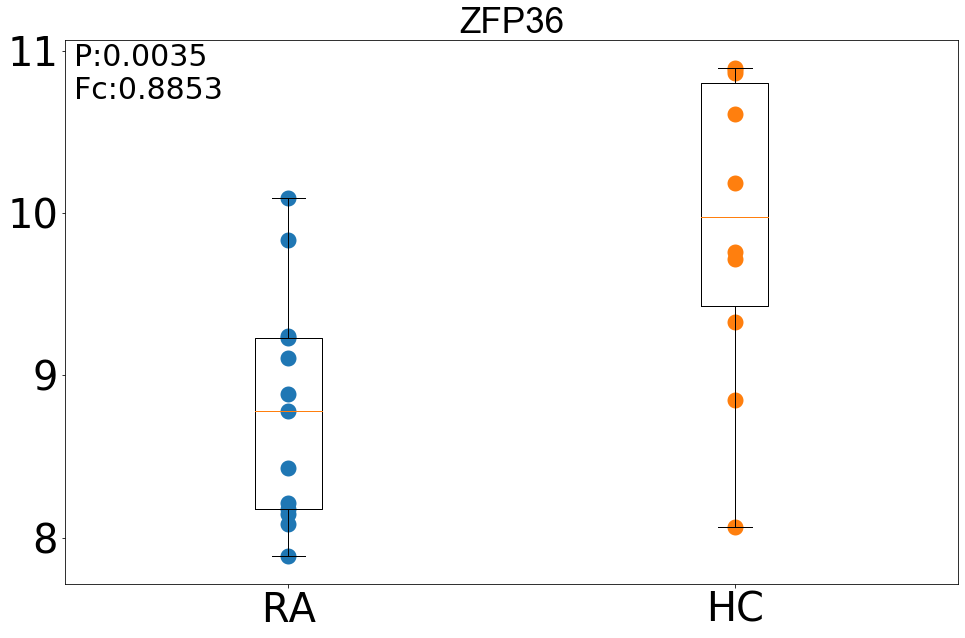

In [66]:
test_ra=[]
test_hc=[]
test_gene = test.ZFP36
for i in range(len(test.index)):
    if 'RA' in test.index[i]:
        test_ra.append(test_gene[i])
    elif 'HC' in test.index[i]:
        test_hc.append(test_gene[i])

pvalue = stats.ttest_ind(test_ra, test_hc).pvalue
pvalue = pvalue.round(4)
foldchange = np.mean(test_ra) / np.mean(test_hc)
foldchange = foldchange.round(4)
text = 'P:{}\nFc:{}'.format(str(pvalue), str(foldchange))
plt.figure(figsize=(16,10))
plt.boxplot([test_ra, test_hc])
plt.scatter([1] * len(test_ra), test_ra, linewidths=10)
plt.scatter([2] * len(test_hc), test_hc, linewidths=10)
formation={'family':'Arial','size':35}
plt.xticks([i for i in range(1,3)], ['RA', 'HC'])
plt.tick_params(labelsize=40)
plt.text(0.52, 10.7, text, fontsize = 30)
plt.title('ZFP36', formation)
plt.savefig('D:\\work\\Rheumatoid arthritis\\result\\figures\\ZFP36.png')